# Task 3: Customer Segmentation / Clustering

Number of Clusters: 4
Davies-Bouldin Index: 0.7963338823953641
Silhouette Score: 0.4005636708366761


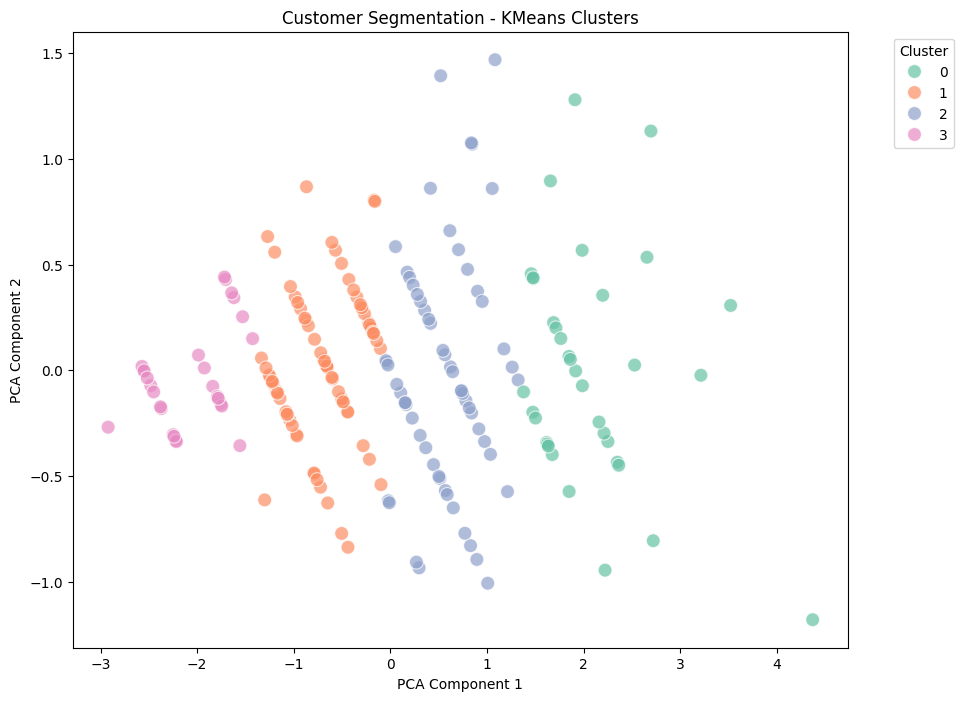

Clustering results have been saved to Customer_Segmentation.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_customers = pd.read_csv("Customers.csv")
df_transactions = pd.read_csv("Transactions.csv")

df_transactions.columns = df_transactions.columns.str.strip()
df_customers.columns = df_customers.columns.str.strip()

amount_column = "TotalValue"

transaction_summary = df_transactions.groupby("CustomerID").agg(
    total_spent=(amount_column, "sum"),
    purchase_count=("TransactionID", "count")
).reset_index()

df_customers = df_customers.merge(transaction_summary, on="CustomerID", how="left").fillna(0)

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
categorical_features = ["Segment"] if "Segment" in df_customers.columns else []
encoded_features = encoder.fit_transform(df_customers[categorical_features]) if categorical_features else np.array([])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features)) if categorical_features else pd.DataFrame()

scaler = StandardScaler()
numerical_features = ["total_spent", "purchase_count"]
scaled_features = scaler.fit_transform(df_customers[numerical_features])

final_data = np.hstack((scaled_features, encoded_features)) if categorical_features else scaled_features

kmeans = KMeans(n_clusters=4, random_state=42)
df_customers['Cluster'] = kmeans.fit_predict(final_data)

db_index = davies_bouldin_score(final_data, df_customers['Cluster'])
sil_score = silhouette_score(final_data, df_customers['Cluster'])

print(f"Number of Clusters: {len(np.unique(df_customers['Cluster']))}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {sil_score}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(final_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_customers['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title("Customer Segmentation - KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df_customers[['CustomerID', 'Cluster']].to_csv("Customer_Segmentation.csv", index=False)

print("Clustering results have been saved to Customer_Segmentation.csv")


### Jai Kumar